# Getting Started: basic analysis and visualizations with py4DSTEM

This notebook walks through some basic analyses and visualizations for 4D-STEM data, including loading and saving data, virtual imaging and diffraction, and tuning visualation parameters.


## Contents:

- Load data
- Basic visualizations
  - Virtual diffraction
    - single diffraction image
    - mean diffraction
    - maximum diffraction
  - Virtual imaging
    - virtual bright-field
    - virtual annular dark-field
  - Contrast, scaling, and colomaps
    - contrast
    - scaling
    - colormaps
- More virtual imaging and diffraction
  - virtual off-axis dark-field imaging
  - virtual selected area diffraction
- Write and read


### Acknowledgements

This tutorial was created by the py4DSTEM instructor team:
- Ben Savitzky (bhsavitzky@lbl.gov)
- Steve Zeltmann (steven.zeltmann@berkeley.edu)
- Stephanie Ribet (sribet@u.northwestern.edu)
- Alex Rakowski (arakowski@lbl.gov)
- Colin Ophus (clophus@lbl.gov)


Last updated:
- Nov 2023 November 1, v0.14.8

## Set up the environment

In [1]:
# import packages
import py4DSTEM

# Display the version of py4DSTEM
print(f"py4DSTEM version = {py4DSTEM.__version__}")

py4DSTEM version = 0.14.8


---
## Download the tutorial data <a class="anchor" id="part_00"></a>

You can download the tutorial dataset here: (501 megabytes)
* [Simulated single crystal and polycrystalline gold](https://drive.google.com/file/d/1BJ_1qWFlbaJuOlKe7TapLFbEbQ0S600U/view?usp=drive_link)

# Load data

In [4]:
# Set the filepath

# first set the path to the directory...
dirpath = "/Users/Ben/work/data/py4DSTEM_sampleData/calibration_simulatedAuNanoplatelet/"

# ...then append the filename to that path
filepath_data = dirpath + "sim_Au_data_all_binned.h5"

In [5]:
# Examine the file contents

# This file is a .h5 file created by py4DSTEM containing multiple pieces of data
# The line of code below shows us all the data the file contains without loading any of it yet.

py4DSTEM.print_h5_tree( filepath_data )

/
|---4DSTEM_simulation
    |---4DSTEM_AuNanoplatelet
    |---4DSTEM_polyAu
    |---defocused_CBED
    |---vacuum_probe




Because this file holds multiple pieces of data, if we don't specify which data we want the `read` function will load all of it.  To load only some of the data, we can specify a path within the file to the data we want using the `datapath` argument, as shown below.  Here, we only want the 4D-STEM scan of polycrystalline gold.

In [6]:
# Load data

datacube = py4DSTEM.read(
    filepath = filepath_data,
    datapath = '4DSTEM_simulation/4DSTEM_polyAu'   # load only the polycrystalline Au dataset
)

What we just did was load data into computer memory and save it as the variable `datacube`.
Let's take a look at that variable by just passing it directly to the Python interpreter:

In [7]:
datacube

DataCube( A 4-dimensional array of shape (100, 84, 125, 125) called '4DSTEM_polyAu',
          with dimensions:

              Rx = [0,1,2,...] pixels
              Ry = [0,1,2,...] pixels
              Qx = [0,1,2,...] pixels
              Qy = [0,1,2,...] pixels
)

#### What's in a DataCube?

This says that `datacube` is an object of type `DataCube`.  This is py4DSTEM's containter for 4D-STEM scans.  We see that it's four-dimensional, with a shape of `(100 x 84 x 125 x 125)`.

What does this mean?

- '**Real space**', or the plane of the sample, has a shape of (100,84), meaning the electron beam
was rastered over a 20x20 grid, and 

- '**Diffraction space**' or reciprocal space, or the plane of the detector, has a shape of (125,125),
meaning the scattered electron intensities are represented in a 125x125 grid.

In py4DSTEM we use 'R' for real space and 'Q' for diffraction space, hence the labels `Rx`, `Ry`, `Qx`, and `Qy` for the 4 dimensions.  Another common convention is to use 'K' for diffraction space.

Currently, we have provided no calibration or pixel sizes to this datacube, which is why the units are in `pixels` and start at `0` with a step of `1`.

In [8]:
# Here are a few more ways to look at a datacube's shape:

print(datacube.shape)        # print the shape of the data
print(datacube.data.shape)   # this is identical to the previous line
print(datacube.Rshape)       # print the shape of "real space"
print(datacube.Qshape)       # print the shape of "diffraction space"

(100, 84, 125, 125)
(100, 84, 125, 125)
(100, 84)
(125, 125)


In [9]:
# The data itself lives in the `.data` attribute, and is a numpy array
# datacube.data

# Basic visualizations

Evaluating data quality and deciding how to proceed with the analysis almost always begins with visualization. Here, we will go through some visualization functions py4DSTEM uses to visualize 4D data.

## Virtual diffraction

4D-STEM is fundamentally a diffraction-based method, in which we collect many diffraction images in a single experiment.  By **virtual diffraction** we mean extracting diffraction-like data in post-processing from a 4D-STEM dataset.  In the simplest cases, we might look at a single diffraction image, or take an average over many images.

### Visualize a single diffraction image

Let's take a look at a single diffraction pattern.

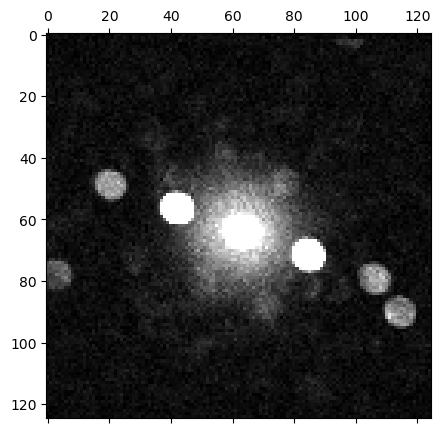

In [10]:
# This line retrieves the diffraction image at beam position (rx,ry) = (10,30) and
# stores it as the variable `dp`

dp = datacube.data[10,30]


# Show the image
py4DSTEM.show(dp)

In [11]:
# Let's make our lives a little easier!

# We're going to use the `show` function quite a bit, so we can save a little typing
# by importing that function into our global namespace, like this:

from py4DSTEM import show

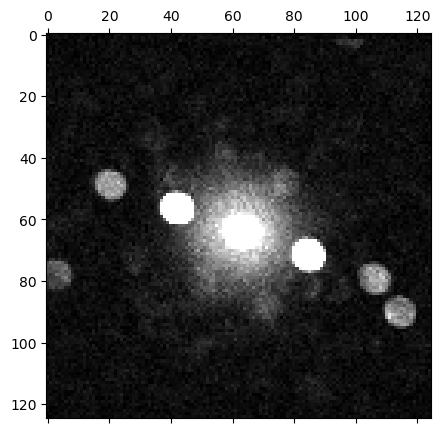

In [12]:
# Now we can do the same thing we just did a little more cleanly:

dp = datacube.data[10,30]

show(dp)

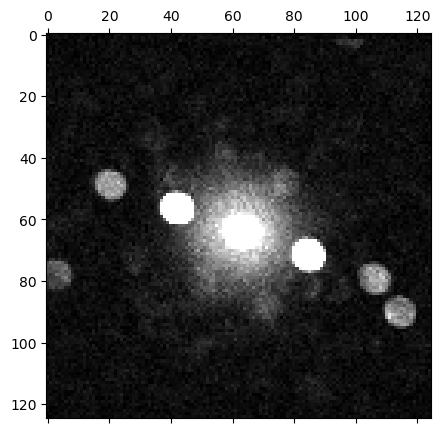

In [13]:
# Let's make our lives even easier still!

# Instead of slicing into `datacube.data`, we can slice into `datacube` directly,
# and achieve the same result:

dp = datacube[10,30]

show(dp)

### Mean diffraction

Looking at a single diffraction pattern is great, but real experiments might consist of thousands or even millions of diffraction patterns. We want to evaluate the contents of the dataset as quickly as possible - is it single crystal? Polycrstalline? Amorphous? A mixture? 

To answer these questions efficiently, it's helpful to get an overview of all of the diffraction that occured in this data acquisition, all at once.  The simplest way to do this is to calculate the average diffraction over the entire scan.

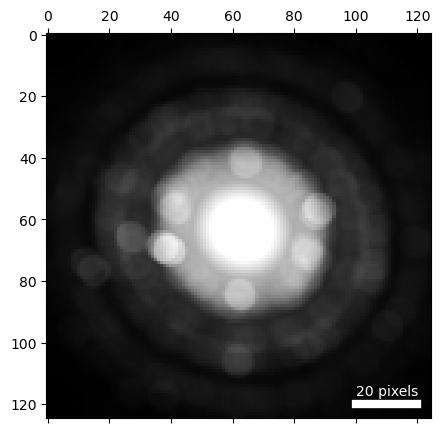

In [14]:
# Mean diffraction pattern

# compute
dp_mean = datacube.get_dp_mean()

# show
show(
    dp_mean,
    scaling='log',
)

In [15]:
# The mean diffraction pattern we calculated is stored in a new py4DSTEM datatype -
# the VirtualDiffraction class.

dp_mean

VirtualDiffraction( A 2-dimensional array of shape (125, 125) called 'dp_mean',
                    with dimensions:

                        dim0 = [0,1,2,...] pixels
                        dim1 = [0,1,2,...] pixels
)

In [16]:
# The data itself is just a numpy array

dp_mean.data

array([[33.19880952, 33.2647619 , 33.17714286, ..., 32.11107143,
        31.93238095, 32.04047619],
       [33.18404762, 33.25690476, 33.27964286, ..., 32.08547619,
        32.12119048, 32.1022619 ],
       [33.2497619 , 33.31821429, 33.35535714, ..., 32.97535714,
        32.92845238, 32.96880952],
       ...,
       [33.00154762, 33.20952381, 33.22166667, ..., 33.61547619,
        33.51166667, 33.32261905],
       [32.96488095, 33.1527381 , 33.12892857, ..., 33.46559524,
        33.3802381 , 33.45464286],
       [32.88392857, 33.15678571, 33.1697619 , ..., 33.51297619,
        33.40535714, 33.43166667]])

#### Mean diffraction summary

What do we learn from the mean diffraction data? What are some limitations of the mean diffraction image?  Expand the contents of the cells below (click the arrow at the upper left corner of this cell) for a summary.

We learn that:
- the data contains disks of intensity in various orientations.  These are Bragg reflections of the central beam, and indicate that our data contains crystalline regions
- the data appears to contain a ring of intensity not associated with Bragg disk reflections - however, this is not entirely clear from this image alone.  Rings of intensity would indicate that our data contains amorphous material.

The major limitation is that:
- we may have averaged out interesting features which are only present in a smaller number of beam positions.

### Maximum diffraction

We define the **maximum** diffraction pattern as an image with the shape of diffraction space, in which the value at each pixel is equal to the the maximum signal recorded at that pixel over all the probe positons in the datacube.  

This means that we'll see the brightest scattering at each pixel, even if it only occured in one diffraction image.  This is a great way to see all of the Bragg scattering, which will always be higher intensity signal.

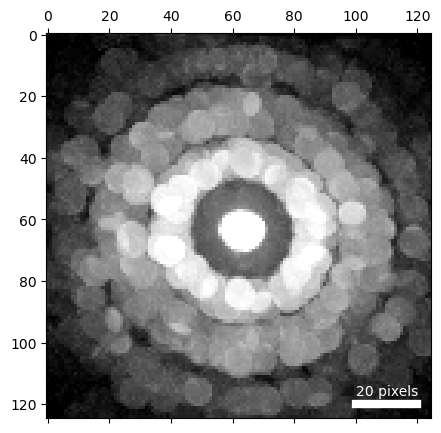

In [17]:
# Maximum diffraction pattern

# compute
dp_max = datacube.get_dp_max()

# show
show(
    dp_max,
    scaling='log'
)

#### Maximum and mean diffraction summary

What do we know about our data after looking at the mean, maximum, and median diffraction?

The data contains various randomly oriented grains with lots of strong Bragg diffraction.

## Virtual imaging: bright-field (BF) and annular dark-field (ADF)

#### What is a **virtual image**?

In traditional STEM, an image is formed by counting up the electrons to land on a detector at each beam position.  The detector can have various different geometries, and that geometry will determine the contrast mechanism and meaning of the resulting image.

A **virtual image** is an image generated from a 4D-STEM dataset in post-processing, in which a detector geometry is defined after the experiment has been completed, and then an image is computed by integrating the data in diffraction space over that detector geometry.  Many different virtual images can be computed from a single 4D-STEM dataset.


#### What are **bright-field** and **dark-field** images?

A **bright-field** image refers to a real space image of the sample in which the image contrast comes from the forward-scattered beam, i.e., the detector is placed over the center disk.  It's called "bright-field" because in a region where there's no sample, the center disk will have its full intensity, and those pixels will therefore have their maximum intensity - so the background in these images (or the "field") will be bright while the sample will be darker.

A **dark-field** image refers to an image of the sample in which the image contrast comes from some off-axis signal, i.e., the detector is placed somewhere outside of the center disk.  These are then "dark-field" images because in regions where there's no sample, no intensity should be scattered off the central axis, and those pixels should have minimal intensity - so the background in these images will be dark while regions containing the sample will be brighter.

### Virtual bright-field imaging

We'll perform virtual imaging in 2 steps:

1. position the virtual detector
2. compute the virtual image

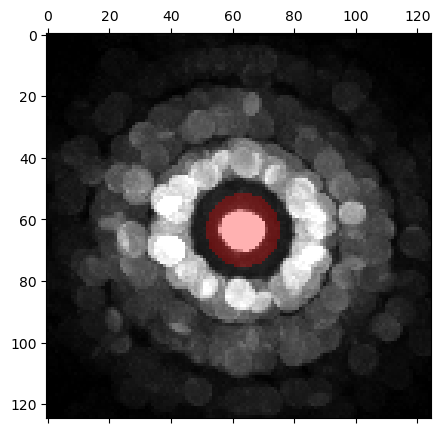

In [20]:
# Position the virtual detector


# set the  geometry
center = (63.5,63.5)
radius = 12

geometry_BF = (
    center,
    radius
)


# overlay selected detector position over mean dp
datacube.position_detector(
    data = dp_max,   # this line is optional; without it, the mean diffraction is used, if it's been computed
    mode = 'circle',
    geometry = geometry_BF
)

100%|███████████████████████████████████████| 8400/8400 [00:00<00:00, 33717.08it/s]


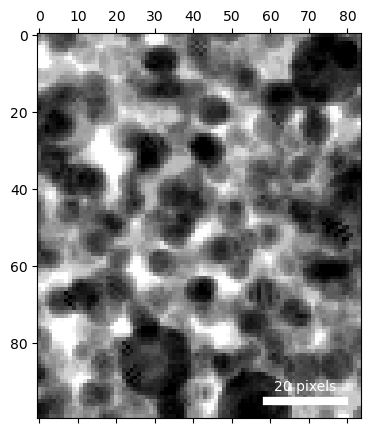

In [21]:
# Capture the virtual BF


# compute
image_BF = datacube.get_virtual_image(
    mode = 'circle',
    geometry = (center,radius),
    name = 'bright_field',       # the output will be stored in `datacube`'s tree with this name
)

# show
show( image_BF )

### Virtual annular dark-field imaging

In an **annular dark-field** image, the detector geometry is an annulus centered about the optic axis, with some inner and outer collection angles.

Try setting the inner collection angle to about 3 times the disk diameter, and the outer angle to about 6 times the radius.

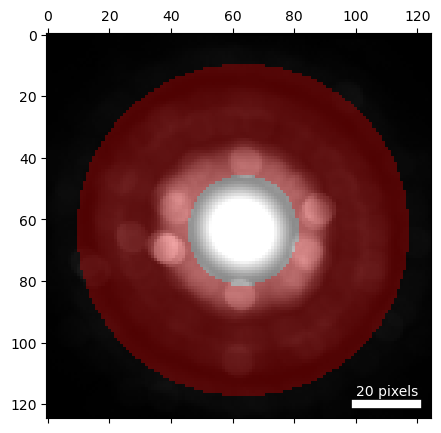

In [22]:
# Position the detector


# set the geometry
center = (63.5,63.5)
r_inner = 18
r_outer = 54

geometry_ADF = (
    center,
    (r_inner,r_outer),
)
    
# overlay selected detector position over mean dp
datacube.position_detector(
    mode = 'annular',
    geometry = geometry_ADF
)

100%|███████████████████████████████████████| 8400/8400 [00:00<00:00, 34358.39it/s]


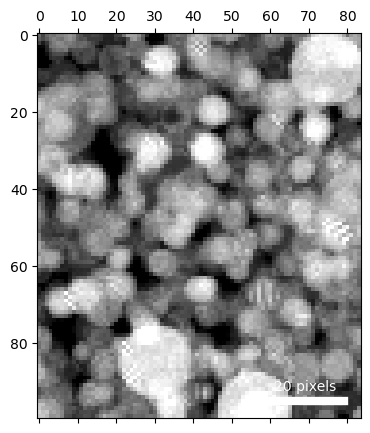

In [23]:
# Capture the virtual ADF

# compute
image_ADF = datacube.get_virtual_image(
    mode = 'annulus',
    geometry = geometry_ADF,
    name = 'annular_dark_field'
)

# show
show( image_ADF )

# Image contrast, scaling, and colormaps

py4DSTEM tries to automatically set the image contrast in a way that will show many of the image features.  However, it is often helpful to modify the scaling and contrast to see as many of the details in the image as possible.  We can do this by 

1. adjusting the image intensity range, 
2. using a nonlinear map of array intensity --> image intensity, or
3. changing the mapping of image intensity --> image color

We can modify each of these by adding some additional arguments to the `show()` function.

In [24]:
# Select a single diffraction image to look at

dp = datacube[10,30]

## Image intensity range

Let's start by adjusting the color axis range, aka the contrast range.  This means specifiying which pixel intensity values we set to black (min) and which we set to white (max).

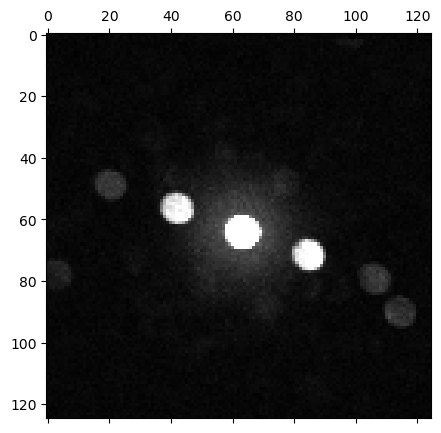

In [25]:
# To tell py4DSTEM we want to manually specify the color range to range from 0 to 500,
# we use these arguments:

show(
    dp,
    intensity_range='absolute',
    vmin=20,
    vmax=500,
    # cmap='viridis',
)

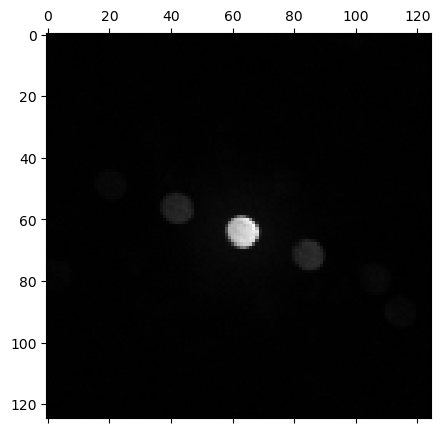

In [26]:
# Here's how we set the min/max intensities to the minimum and maximum values in the image.
# This is not usually terribly useful for displaying diffraction data!

show(
    dp,
    intensity_range='minmax',
)

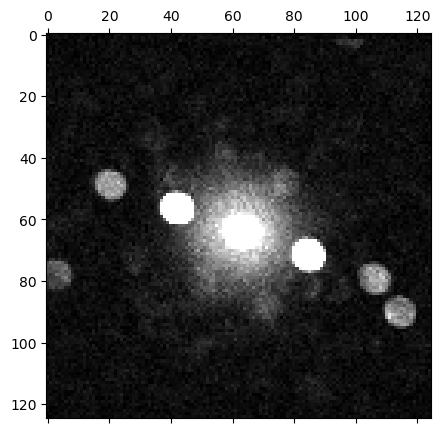

In [27]:
# We can also set the intensity range cutoffs according to percentiles of the pixel intensities,
# here called the "ordered" method.  The code below sets the dimmest 2% of pixels to black and
# the brightest 2% of pixels to white.

# Note that the code below is identical to the default behavior of the show function!

show(
    dp,
    intensity_range='ordered',
    vmin=0.02,
    vmax=.98,
)

Using the ordered method, we can see several diffracted Bragg disks, and a distribution of electrons scattered randomly to low angles characteristic of amorphous samples or a plasmon background.

However, we had to saturate the center Bragg disk in order to see the weak features. Can we see both strong and weak features?  We can!  We just need to use logarithmic or power law scaling of the image intensity.

## Intensity scaling

Often it is useful to scale the array pixel intensities before displaying them in an image, such that

> ```image_{i,j} = f(array_{i,j})```

where `_{i,j}` refers to pixel (i,j), and `f` is some function.  In displaying diffraction data, the function `f` is most often a logarithmic function, or occassionally a power law.

### Logarithmic scaling

Logarithmic scaling is a good default for diffraction data, and is a good place to start if you're not sure what to expect in a dataset.  Logarithmic scaling is best when the features of interest have intensities which vary by multiple orders of magnitude.  

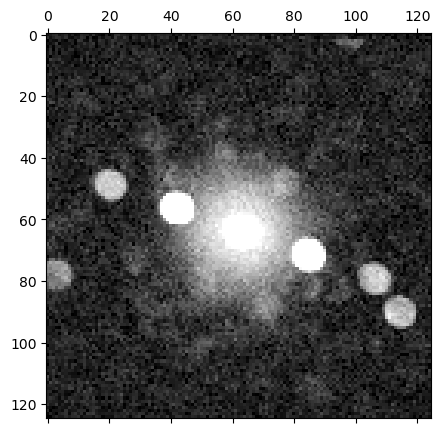

In [28]:
# Use logarithmic scaling

show(
    dp,
    scaling='log',
)

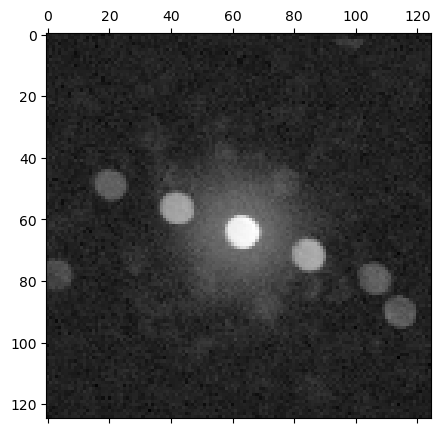

In [29]:
# We can still adjust vmin/vmax as before. For logarithmic scaling, using the 
# full range of intensities is a good idea.  We can do this with vmin/vmax=0/1, since
# the intensity_range default is "ordered":

show(
    dp,
    scaling='log',
    vmin=0,
    vmax=1,
)

Now we can appreciate the full range of features present in the data:

- the very bright center disk
- somewhat weaker crystalline Bragg diffracted spots
- a small number of electrons randomly scattered to low angles

### Power law scaling

Scaling by a power law is sometimes more useful for visualization of diffraction patterns, because we can tune the power

```image pixel intensity = (array pixel intensity)^power```

to highlight particular image features.  This may exclude some features - and this may be desireable, for instance when extremely weak features are present which are not scientifically interesting or large enough to affect our analysis and which we don't really need to examine closely, such as detector dark current.  However it is important to be judicious in scaling your data, to examine several scalings, and to be sure to state any scaling used and provide unscaled or standard scalings (e.g. logarithmic) where appropriate!!

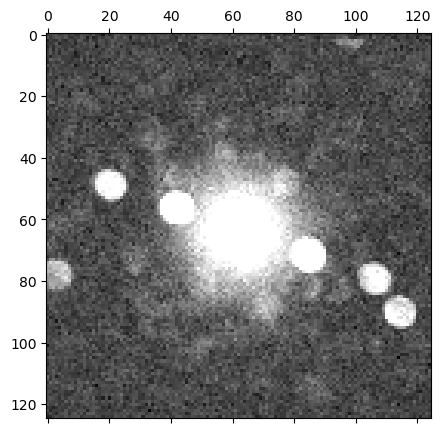

In [30]:
# Power law scaling using the cube root.

show(
    dp,
    scaling='power',
    power=0.33,
    vmin=0,
    vmax=0.95,
)

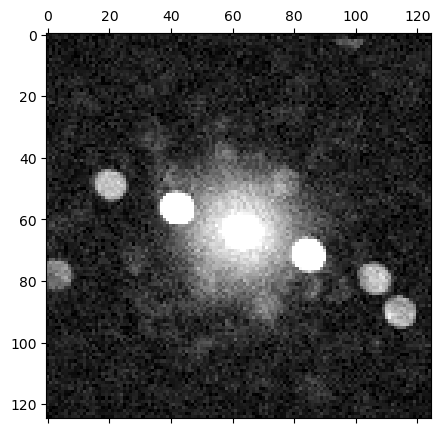

In [31]:
# Power law scaling using the quarter root:

show(
    dp,
    scaling='power',
    power=0.25,
    #cmap='turbo',
)

### Colormaps

`show` accepts a keyword argument `cmap` to specifies the colorscale used to map pixel intensities to colors.  matplotlib, Python's core visualization library, supports a huge number of built-in colormaps, which [you can peruse here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).  A few examples are below.

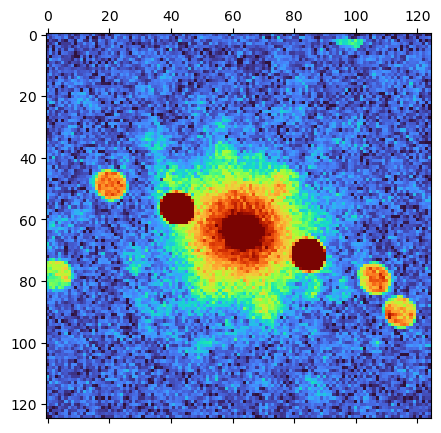

In [32]:
# Power law scaling using the quarter root and the 'turbo' colormap

show(
    dp,
    scaling='power',
    power=0.25,
    # vmin=0,
    # vmax=1,
    cmap='turbo',
)

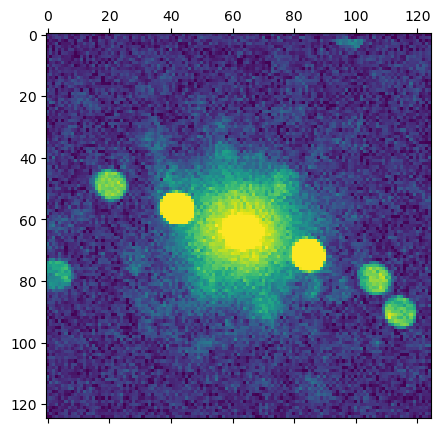

In [33]:
# Log law scaling and the 'viridis' colormap

show(
    dp,
    scaling='log',
    # vmin=0,
    # vmax=1,
    cmap='viridis',
)

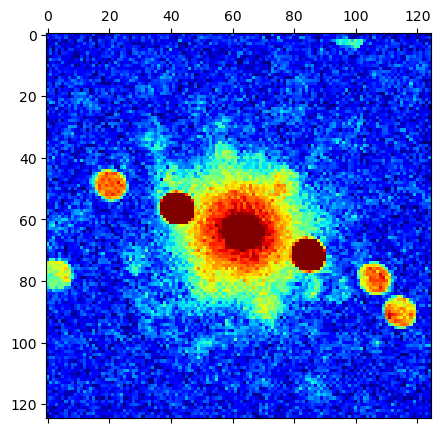

In [34]:
# Log law scaling and the 'jet' colormap
# Note: 'jet' is terrible ;_;

show(
    dp,
    scaling='log',
    # vmin=0,
    # vmax=1,
    cmap='jet',
)

# More virtual imaging and diffraction

So far we've only scratched the surface of what can be done with virtual imaging and virtual diffraction.  Here's two more quick examples.

## Off axis dark-field imaging

In traditional TEM dark-field imaging, the sample is illuminated with a parallel beam, and an aperture is placed in the diffraction plane around a point of interest, creating a pattern in the image plane resulting from electrons scattered only through those areas of diffraction space.  We can create an analogous virtual image by placing a circular detector in an off-axis position in diffraction space.

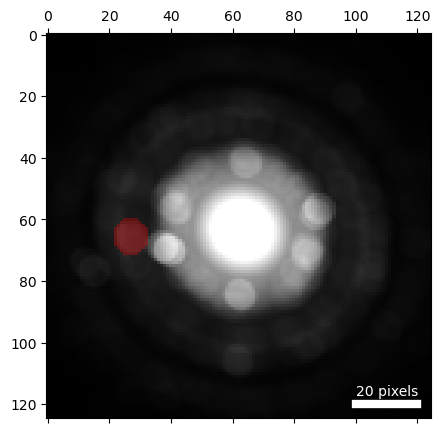

In [35]:
# Position detector


qx0_DF,qy0_DF = 65.5,27
#qx0_DF,qy0_DF = 84,62.5
r_DF = 6

geometry_DF01 = (
    (qx0_DF,qy0_DF),
    r_DF
)

datacube.position_detector(
    mode = 'circular',
    geometry = geometry_DF01
)

100%|███████████████████████████████████████| 8400/8400 [00:00<00:00, 34861.44it/s]


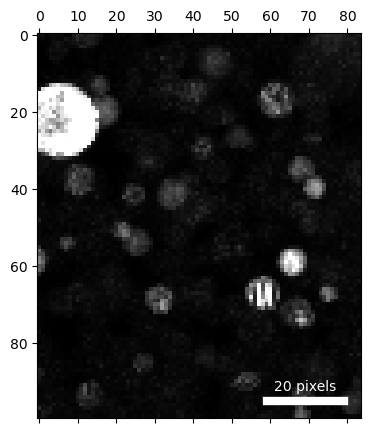

In [36]:
# Capture and display the off-axis DF image

image_DF01 = datacube.get_virtual_image(
    mode = 'circle',
    geometry = geometry_DF01,
    name = 'virt_dark_field_01'
)
show( image_DF01 )

## Virtual selected area diffraction

We can also do the inverse - create an average diffraction pattern from some subset of scan positions, showing us what the scattering is like in just those positions in real space.

We've already done a little virtual diffraction - the mean and max diffraction patterns we computed at the beginning of this notebook.  In these cases we used all the data; below we'll compute similar patterns using only a selected subset of scan positions.

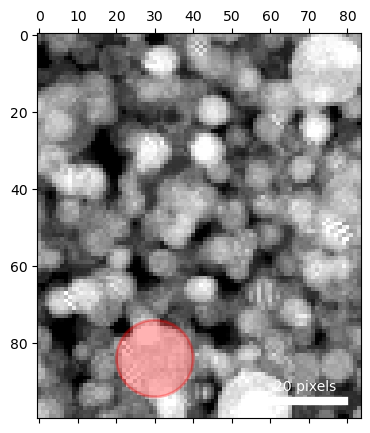

In [37]:
# Select a region of real space with a circular mask.
# Here, we'll try to look at one of the nanoparticles


# set geometry
mask_x0, mask_y0 = 84,30
mask_radius = 10


# plot the mask geometry, overlaid onto the dark field image we created earlier
py4DSTEM.visualize.show(
    image_ADF,
    circle = {
      'center':(mask_x0, mask_y0),
      'R': mask_radius,
      'alpha':0.3,
      'fill':True
    }
)

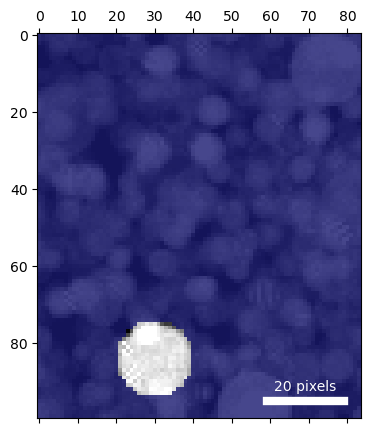

In [38]:
# The virtual diffraction method expects a real-space shaped boolean mask - that is, an array with
# values of True and False - to tell it which scan positions to use to make the virtual image.

# The code below makes and displays a mask

import numpy as np
ryy,rxx = np.meshgrid(
    np.arange(datacube.R_Ny),
    np.arange(datacube.R_Nx),
)
rrr = np.hypot( rxx-mask_x0, ryy-mask_y0 )
mask_SAED = rrr < mask_radius

# show
show(
    image_ADF,
    mask = mask_SAED,
    mask_alpha = 0.2,
    mask_color = 'midnightblue'
)

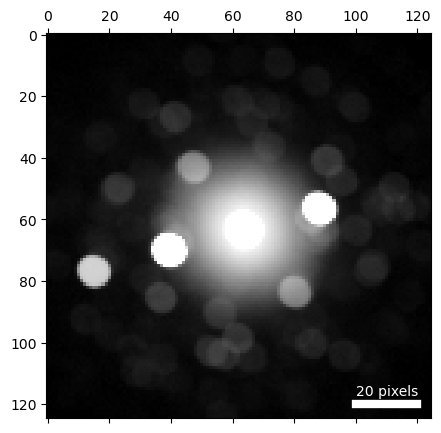

In [39]:
# Find the mean of the diffraction pattern in the specified region

selected_area_diffraction_01 = datacube.get_virtual_diffraction(
    method = 'mean',
    mask = mask_SAED,
    name = 'selected_area_diffraction_01'
)

# show
py4DSTEM.visualize.show(
    selected_area_diffraction_01,
    scaling='log',
)

We placed our mask over one Au nanoparticle, so that average diffraction pattern above shows us something about the orientation of this particle.  In a later tutorial, we'll see how to map the crystallographic orientations of all the particles in the dataset.

# Write and read

py4DSTEM saves HDF5 files formatted according to the EMD1.0 specification.  You can read more here:

- EMD1.0: https://emdatasets.com/format/
- HDF5: https://www.hdfgroup.org/about-us/

Each EMD1.0 file is like a small filesystem, and may contain nested directories and pieces of data.  When saving an EMD1.0 file, you can pass just the data you want to save to the file writer, or, you can structure the data into a filetree.

In [40]:
# set a filepath

dirpath

filepath_save = dirpath + 'getting_started.h5'
print(filepath_save)

/Users/Ben/work/data/py4DSTEM_sampleData/calibration_simulatedAuNanoplatelet/getting_started.h5


In [41]:
# make a tree of objects to save

# make the root of the tree
root = py4DSTEM.Root( name='getting_started' )

# add data to the tree
root.graft( dp_mean )
root.graft( dp_max )
root.graft( image_BF )
root.graft( image_ADF )
root.graft( image_DF01 )
root.graft( selected_area_diffraction_01 )

# examine the tree
root

Root( A Node called 'getting_started', containing the following top-level objects in its tree:

          dp_mean                  	 (VirtualDiffraction)
          dp_max                   	 (VirtualDiffraction)
          bright_field             	 (VirtualImage)
          annular_dark_field       	 (VirtualImage)
          virt_dark_field_01       	 (VirtualImage)
          selected_area_diffraction_01 	 (VirtualDiffraction)
)

In [42]:
# save

py4DSTEM.save(
    filepath_save,
    root,
    mode = 'o'    # this says that if a file of this name already exists, we'll overwrite it
)

In [43]:
# inspect the resulting HDF5 file

py4DSTEM.print_h5_tree(filepath_save)

/
|---getting_started
    |---annular_dark_field
    |---bright_field
    |---dp_max
    |---dp_mean
    |---selected_area_diffraction_01
    |---virt_dark_field_01




In [44]:
# check that it worked as expected - load everything:

d = py4DSTEM.read(filepath_save)

In [45]:
d.tree()

/
|---annular_dark_field
|---bright_field
|---dp_max
|---dp_mean
|---selected_area_diffraction_01
|---virt_dark_field_01


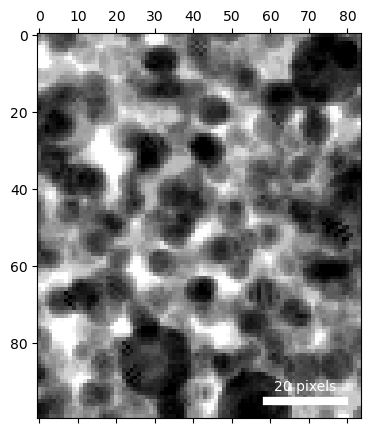

In [46]:
show( d.tree('bright_field') )